In [1]:
import pyvo as vo
import requests
import matplotlib.pyplot as plt
from io import BytesIO


In [2]:
# PyVO will throw a lot of warnings, as Astropy struggles 
# to recognize geospatial CRS and UCD's, so disable them:
import warnings
warnings.simplefilter('ignore')


In [3]:
service = vo.dal.TAPService("http://epn1.epn-vespa.jacobs-university.de/tap")
query="""SELECT TOP 20
craterT.granule_uid, craterT.diameter, craterT.feature_name,
craterT.crater_morphology_3, crismT.* FROM (
SELECT * FROM mars_craters.epn_core
WHERE diameter > 50 AND diameter < 80 AND crater_morphology_3!='') AS craterT
INNER JOIN (
SELECT * FROM crism.epn_core WHERE sensor_id='L') AS crismT
ON (1=INTERSECTS(crismT.s_region,craterT.s_region))"""
resultset = service.search(query)
results=[{resultset.fieldnames[i]:row[resultset.fieldnames[i]] for i in 
          range(len(resultset.fieldnames))} for row in resultset]
results


[{'access_estsize': 726679,
  'access_format': b'application/x-geotiff',
  'access_url': b'http://access.planetserver.eu/rasdaman/ows?&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=frt0001224a_07_if164l_trr3&FORMAT=image/tiff',
  'bib_reference': b'10.1029/2006JE002682',
  'c1_resol_max': 0.000366233766233766,
  'c1_resol_min': 0.000366233766233766,
  'c1max': 19.708,
  'c1min': 19.426,
  'c2_resol_max': 0.000366355140186925,
  'c2_resol_min': 0.000366355140186925,
  'c2max': -39.443,
  'c2min': -39.639,
  'c3_resol_max': nan,
  'c3_resol_min': nan,
  'c3max': nan,
  'c3min': nan,
  'crater_morphology_3': b'Floor Deposits',
  'creation_date': b'2016-01-01T00:00:00',
  'dataproduct_type': b'sc',
  'diameter': 78.88,
  'emergence_max': 2.81329679489136,
  'emergence_min': 2.81329679489136,
  'external_link': b'http://aux1.epn-vespa.jacobs-university.de/subGranule3/index.html?callback=frt0001224a_07_if164l_trr3',
  'feature_name': b'',
  'granule_gid': b'FRT',
  'granule_uid': 


Image number: 0, Coverage ID: FRT0001224A_07_IF164L_TRR3, 
Latitude: -39.639 - -39.443, Longitude: 19.426 - 19.708, 
Crater morphology: Floor Deposits
Subgranule viewer: http://aux1.epn-vespa.jacobs-university.de/subGranule3/index.html?callback=frt0001224a_07_if164l_trr3


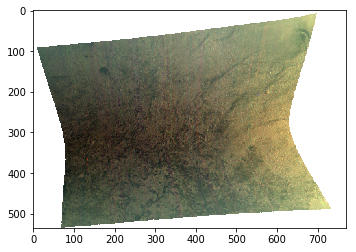


Image number: 1, Coverage ID: FRT00009E66_07_IF164L_TRR3, 
Latitude: -39.862 - -39.659, Longitude: 19.558 - 19.842, 
Crater morphology: Floor Deposits
Subgranule viewer: http://aux1.epn-vespa.jacobs-university.de/subGranule3/index.html?callback=frt00009e66_07_if164l_trr3


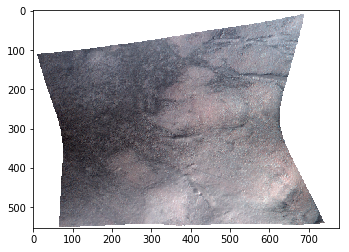


Image number: 2, Coverage ID: FRT00012F6B_07_IF164L_TRR3, 
Latitude: -47.619 - -47.397, Longitude: 5.38 - 5.709, 
Crater morphology: Tectonics / Fractured / Floor Deposits / Slump Deposits
Subgranule viewer: http://aux1.epn-vespa.jacobs-university.de/subGranule3/index.html?callback=frt00012f6b_07_if164l_trr3


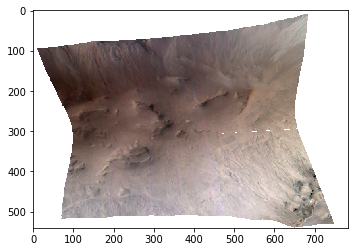


Image number: 3, Coverage ID: FRT00003590_07_IF164L_TRR3, 
Latitude: -47.575 - -47.366, Longitude: 4.221 - 4.535, 
Crater morphology: Tectonics / Fractured / Floor Deposits / Slump Deposits
Subgranule viewer: http://aux1.epn-vespa.jacobs-university.de/subGranule3/index.html?callback=frt00003590_07_if164l_trr3


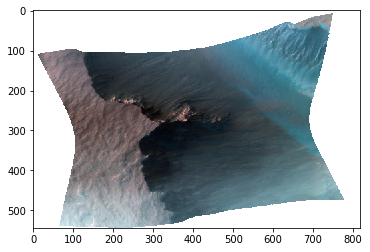


Image number: 4, Coverage ID: FRT00003E23_07_IF163L_TRR3, 
Latitude: -46.974 - -46.792, Longitude: 4.17 - 4.479, 
Crater morphology: Tectonics / Fractured / Floor Deposits / Slump Deposits
Subgranule viewer: http://aux1.epn-vespa.jacobs-university.de/subGranule3/index.html?callback=frt00003e23_07_if163l_trr3


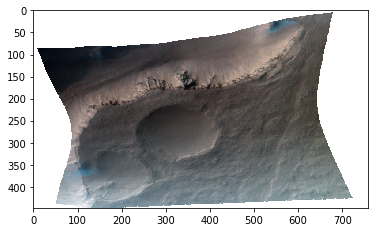

In [4]:
def showPreviewImg(link):
    plt.imshow(plt.imread(BytesIO(requests.get(link.decode('utf-8')).content)))
    plt.plot()
for i in range(5):
#for i in range(len(results)):
    print("\nImage number: "+str(i)+", Coverage ID: "+
        str(results[i]['granule_uid_'].decode('utf-8'))+
        ", \nLatitude: "+str(results[i]['c2min'])+" - "+str(results[i]['c2max'])+
       ", Longitude: "+str(results[i]['c1min'])+" - "+str(results[i]['c1max'])+
       ", \nCrater morphology: "+str(results[i]['crater_morphology_3'].decode('utf-8'))+
       "\nSubgranule viewer: "+str(results[i]['external_link'].decode('utf-8')))
    plt.figure()
    showPreviewImg(results[i]['thumbnail_url'])
    plt.show()
    

In [5]:
#START SAMP Hub
from astropy.samp import SAMPHubServer
h = SAMPHubServer()
h.start()


INFO: Hub set to run with Web Profile support enabled. [astropy.samp.hub]
INFO: Hub started [astropy.samp.hub]


In [6]:
#START SAMP Client
from astropy.samp import SAMPIntegratedClient
client = SAMPIntegratedClient()
client.connect()
class sampHelper:
    def keepParams(self,private_key, sender_id, 
                   mtype, message, extra):
        self.params = message
helper=sampHelper()
client.bind_receive_notification(
    "spectrum.load.ssa-generic", helper.keepParams)


In [7]:
#SEND SPECTRA


A Web application which declares to be

Name: 
Origin: http://aux1.epn-vespa.jacobs-university.de

is requesting to be registered with the SAMP Hub.
Pay attention that if you permit its registration, such
application will acquire all current user privileges, like
file read/write.

Do you give your consent? [yes|no]
>>> yes


In [8]:
helper.params


{'url': 'http://aux1.epn-vespa.jacobs-university.de/subGranule3/lib/tmp/dDSNhHrudj.votable'}

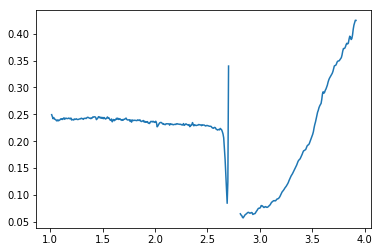

In [9]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
t = Table.read(helper.params['url'])
wavelengths=np.asarray(t.columns['wavelength'].data.tolist())
reflectance=np.asarray(t.columns['reflectance'].data.tolist())
reflectanceMasked=ma.masked_array(reflectance,reflectance==0)
plt.plot(wavelengths,reflectanceMasked)
plt.show()


In [10]:
h.stop()


INFO: Hub is stopping... [astropy.samp.hub]
INFO: Hub stopped. [astropy.samp.hub]
